# Pseudospectral: Method of Mean Weighted Residuals

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate
import scipy.linalg as la
from scipy.optimize import root
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib notebook

In [3]:
def cheb(N):
    """Returns the (N+1)x(N+1) cardinal function differentiation matrix D 
    and the N+1 Chebyshev nodes.
    """
    x =  np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    
    dX = X - X.T
    
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D  = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

I will use the differentiation matrix to numerically approximate the derivative of $u(x) = e^{x}\cos(6x)$ on a grid of $N$ Chebychev points where $N=6, 8,$ and $10.$
(Use the linear system $D U \approx U'$.)
Then use barycentric interpolation `scipy.interpolate.barycentric_interpolate` to approximate $u'$ on a grid of 100 evenly spaced points.

Then I will compare my approximation to the exact derivative.
Note that this convergence would not be occurring if the collocation points were equally spaced.

In [6]:
barycentric_interpolate?

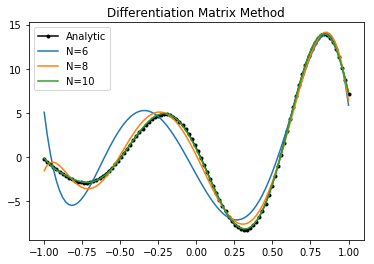

In [27]:
u = lambda x: np.exp(x)*np.cos(6*x)
deriv = lambda x: np.exp(x)*(np.cos(6*x) - 6*np.sin(6*x))
domain = np.linspace(-1,1,100)
plt.plot(domain,deriv(domain),'k-o',ms=3,label='Analytic')
for N in [6,8,10]:
    D,x = cheb(N)
    plt.plot(domain,barycentric_interpolate(x,D@u(x),domain),label="N={}".format(N))

plt.legend(loc=0)
plt.title("Differentiation Matrix Method")
plt.show()

I will use the pseudospectral method to solve the boundary value problem

\begin{align*}
&{ } u'' = e^{2x}, \quad x \in (-1,1), \\
&{ } u(-1) = 0, \quad u(1) = 0.
\end{align*}

I'll use $N=8$ in the `cheb(N)` method and use barycentric interpolation to approximate $u$ on 100 evenly spaced points.
Then compare the numerical solution with the exact solution:

$$u(x) = \frac{- \cosh(2) - \sinh(2)x + e^{2x}}{4}.$$

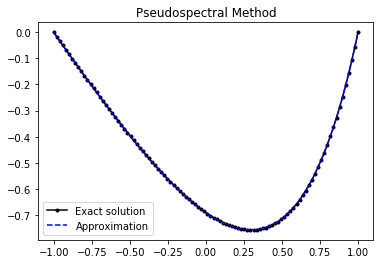

In [26]:
exact = lambda x:(-np.cosh(2)-np.sinh(2)*x+np.exp(2*x))/4
upp = lambda x: np.exp(2*x)
D,x = cheb(8)
domain = np.linspace(-1,1,100)
F = upp(x)
F[0],F[-1]=0,0
D2 = np.dot(D,D)
D2[0,:],D2[-1,:] = 0,0
D2[0,0], D2[-1,-1] = 1, 1
U = barycentric_interpolate(x,la.solve(D2,F),domain)
plt.plot(domain,exact(domain),'k-o',ms=3,label="Exact solution")
plt.plot(domain,U,'b--',label="Approximation")
plt.legend(loc=0)
plt.title("Pseudospectral Method")
plt.show()

I will use the pseudospectral method to solve the boundary value problem

\begin{align*}
&{ } u'' + u' = e^{3x}, \quad x \in (-1,1), \\
&{ } u(-1) = 2, \quad u(1) = -1.
\end{align*}
	
And use $N=8$ in the `cheb(N)` method and use barycentric interpolation to approximate $u$ on 100 evenly spaced points.

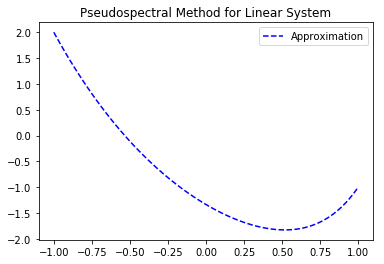

In [25]:
g = lambda x: np.exp(3*x)
D,x = cheb(8)
domain = np.linspace(-1,1,100)
F = g(x)
F[0],F[-1]=-1,2
D2 = np.dot(D,D)
D3 = D2+D
D3[0,:],D3[-1,:] = 0,0
D3[0,0], D3[-1,-1] = 1, 1
U = barycentric_interpolate(x,la.solve(D3,F),domain)
plt.plot(domain,U,'b--',label="Approximation")
plt.legend(loc=0)
plt.title("Pseudospectral Method for Linear System")
plt.show()

I'll use the pseudospectral method to solve the boundary value problem

\begin{align*}
&{ } u'' = \lambda\sinh(\lambda u), \quad x \in (0,1), \\
&{ } u(0) = 0, \quad u(1) = 1
\end{align*}

for several values of $\lambda$: $\lambda = 4, 8, 12$. 
Begining by transforming this BVP onto the domain $-1<x<1$.
I'll use $N=20$ in the `cheb(N)` method and use barycentric interpolation to approximate $u$ on 100 evenly spaced points.

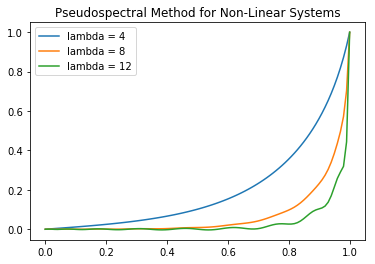

In [24]:
D,x = cheb(20)
domain = np.linspace(-1,1,100)
def F(U):
    D2=4*np.dot(D,D)
    D2[0,:],D2[-1,:] = 0,0
    D2[0,0], D2[-1,-1] = 1, 1
    f=l*np.sinh(l*U)
    f[0],f[-1] = 1,0
    out = D2@U-f
    return out

for l in [4,8,12]:
    guess = np.ones_like(x)
    solution = root(F,guess).x
    sol = barycentric_interpolate(x,solution,domain)
    plt.plot(np.linspace(0,1,100),sol,label="lambda = {}".format(l))
    
plt.legend(loc=0)
plt.title("Pseudospectral Method for Non-Linear Systems")
plt.show()

Next, we'll find the function $y(x)$ that satisfies $y(-1) = 1$, $y(1) = 7$, and whose surface of revolution (about the $x$-axis) minimizes surface area.

Using $N=50$ in the `cheb(N)` method and use barycentric interpolation to approximate $u$ on 100 evenly spaced points.

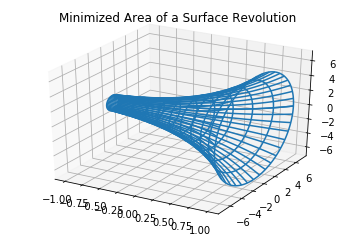

In [23]:
D,xh = cheb(50)
x = np.linspace(-1, 1, 100)
def Y(U):
    D2=np.dot(D,D)
    D2[0,:],D2[-1,:] = 0,0
    D2[0,0], D2[-1,-1] = 1, 1
    f=np.ones_like(xh)
    out = U*(D2@U)-(D@U)*(D@U)-f
    out[0] = U[0]-7
    out[-1] = U[-1]-1
    return out

sol = root(Y,2*np.ones_like(xh)).x    
barycentric = barycentric_interpolate(xh,sol,x) #This is the output of barycentric_interpolate() on ←-100 points
theta = np.linspace(0,2*np.pi,401)
X, T = np.meshgrid(x, theta)
Y, Z = barycentric*np.cos(T), barycentric*np.sin(T)
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
plt.title("Minimized Area of a Surface Revolution")
plt.show()